In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the GOFC data more efficiently
GFOC_dir = "/home/dschwarz/Documents/MT/Dataset/Dataset_MSc/GFOC_RDCDFI.csv"
GFOC_data = pd.read_csv(GFOC_dir, low_memory=True)

# Load the SWMA data more efficiently
SWMA_dir = "/home/dschwarz/Documents/MT/Dataset/Dataset_MSc/SWMA_RDAWFI.csv"
SWMA_data = pd.read_csv(SWMA_dir, low_memory=True)

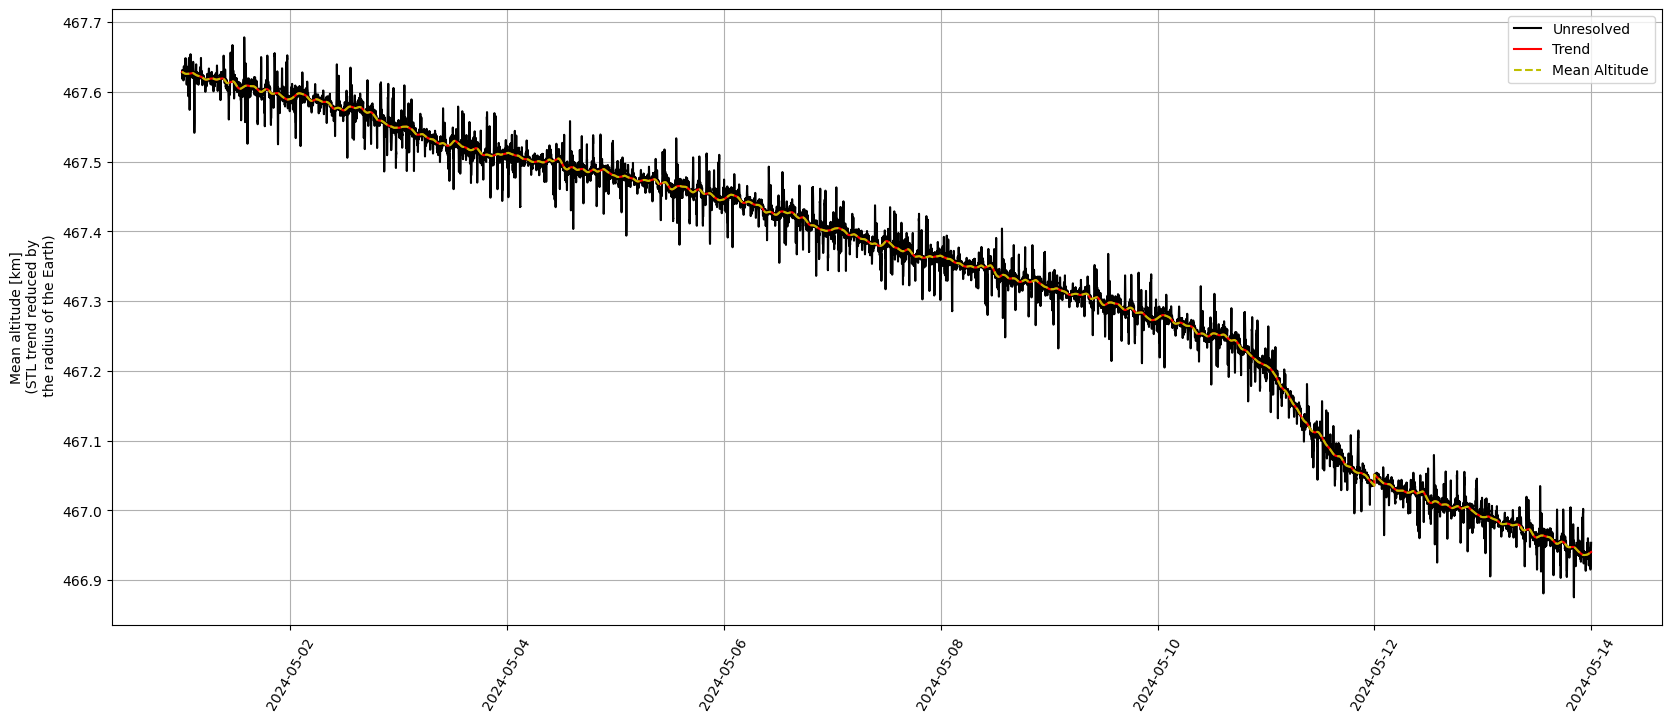

In [3]:
import matplotlib.dates as mdates

# =========================== Input ===================================
start = GFOC_data[GFOC_data['time'] == '2024-05-01 00:00:00'].index[0]
end = GFOC_data[GFOC_data['time'] == '2024-05-14 00:00:00'].index[0]

# Add an option for monthly, daily, or hourly ticks
tick_interval = 'daily'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 2  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)

# =====================================================================


# Time conversion
GFOC_time = GFOC_data['time'][start:end]
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')
SWMA_time = SWMA_data['time'][start:end]
SWMA_time = pd.to_datetime(SWMA_time, format='%Y-%m-%d %H:%M:%S')


# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))                         
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)

# Create a figure with three subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 8))

# Plot data
ma_unresolved = SWMA_data['unresolved'][start:end] / 1000 - 6378.137
ma_trend = SWMA_data['trend'][start:end] / 1000 - 6378.137
ma = SWMA_data['mean_altitude'][start:end]

# Plot the unresolved, trend, and mean altitude data
ax1.plot(SWMA_time, ma_unresolved, 'k', label='Unresolved')
ax1.plot(SWMA_time, ma_trend, 'r', label='Trend')
ax1.plot(SWMA_time, ma, 'y--', label='Mean Altitude')

# Set labels and grid
ax1.set_ylabel('Mean altitude [km]\n (STL trend reduced by\n the radius of the Earth)', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid()

# Format ticks
format_ticks(ax1, tick_interval, tick_step)

# Add legend
ax1.legend(loc='upper right')

# Show the plot
plt.show()

Mean difference between TLE and STL: 3185.00 +- 15.69 m


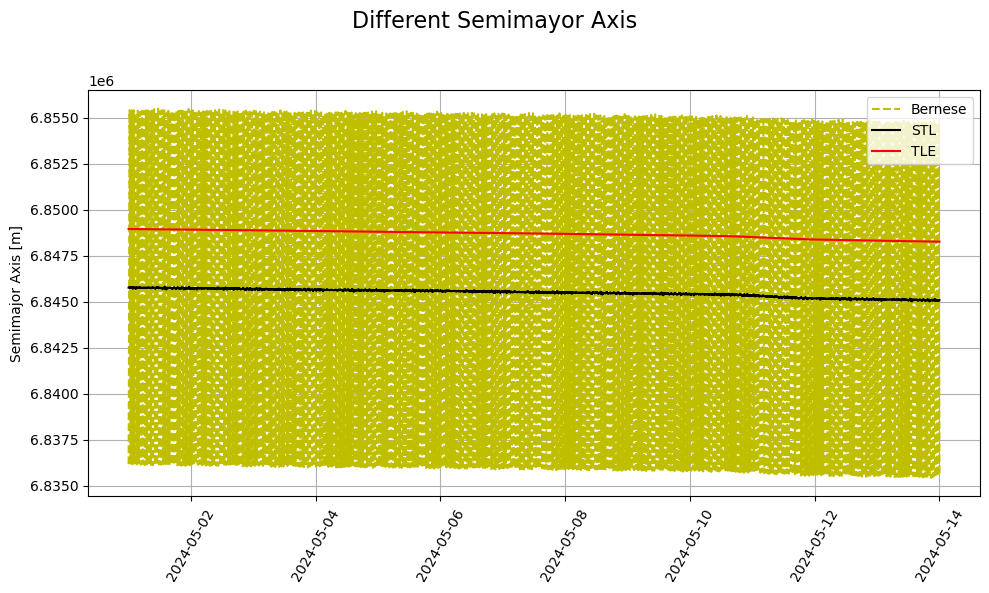

In [ ]:
import numpy as np

# Create a figure with three subplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Plot data
a_STL = SWMA_data['unresolved'][start:end]
a_TLE = SWMA_data['a [m] TLE'][start:end] * 1e3
a_Bernese = SWMA_data['a [m]'][start:end]

d_TLE_STL = a_TLE - a_STL
mean_d_TLE_STL = np.mean(d_TLE_STL)
std_d_TLE_STL = np.std(d_TLE_STL)
print(f"Mean difference between TLE and STL: {mean_d_TLE_STL:.2f} +- {std_d_TLE_STL:.2f} m")

a_TLE2 = a_TLE - mean_d_TLE_STL

# Plot the unresolved, trend, and mean altitude data
ax1.plot(SWMA_time, a_Bernese, 'y--', label='Bernese')
ax1.plot(SWMA_time, a_STL, 'k', label='STL')
ax1.plot(SWMA_time, a_TLE, 'r', label='TLE')
# ax1.plot(SWMA_time, a_TLE2, 'm', label='TLE "corrected"')

# Set labels and grid
ax1.set_ylabel('Semimajor Axis [m]', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid()

# Format ticks
format_ticks(ax1, tick_interval, tick_step)

# Add legend
ax1.legend(loc='upper right')

# Set the figure title
fig.suptitle('Different Semimayor Axis', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

# Orbital Decay

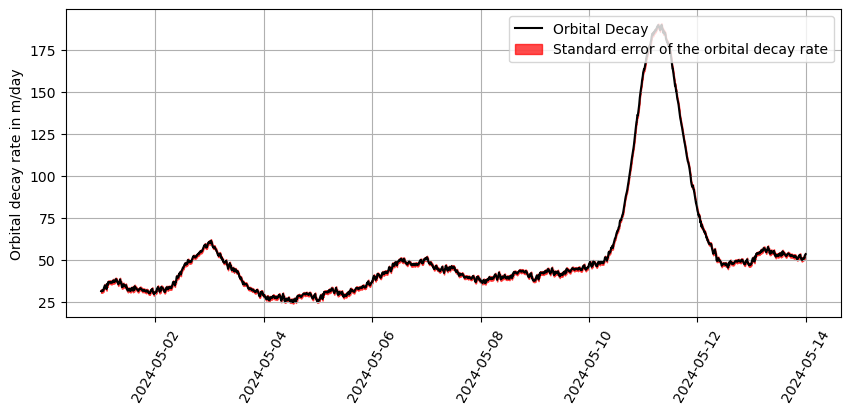

In [5]:
# Create a figure with three subplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))

# Plot data
od = SWMA_data['orbital_decay'][start:end]
od_se = SWMA_data['se_orbital_decay'][start:end]
# od = SWMA_data['res'][start:end]
# od_se = SWMA_data['res_std'][start:end] * 10

# Plot the unresolved, trend, and mean altitude data
ax1.plot(SWMA_time, od, 'k', label='Orbital Decay')
ax1.fill_between(SWMA_time, od - od_se, od + od_se, color='r', alpha=0.7, label='Standard error of the orbital decay rate')

# Set labels and grid
ax1.set_ylabel('Orbital decay rate in m/day', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid()

# Format ticks
format_ticks(ax1, tick_interval, tick_step)

# Add legend
ax1.legend(loc='upper right')

# Show the plot
plt.show()